In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#To visualize the whole grid
pd.options.display.max_columns = 999

#Kaggle divides the dataset already into Train and Test data
train = pd.read_csv(r"C:\Users\abdullah-laptop\Documents\Data Test\train.csv")
test = pd.read_csv(r"C:\Users\abdullah-laptop\Documents\Data Test\test.csv")

In [ ]:
train.head()
train.info()
train.describe()


In [ ]:
# Check for duplicates
idsUnique = len(set(train.User_ID))
idsTotal = train.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

In [14]:

train['Product_Category_2']=train['Product_Category_2'].fillna(-2.0).astype("float")
train['Product_Category_3']=train['Product_Category_3'].fillna(-2.0).astype("float")

In [15]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,-2.0,-2.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,-2.0,-2.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,-2.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,-2.0,-2.0,7969


In [43]:
#Turn gender binary
gender_dict = {'F':0, 'M':1}
test["Gender"] = test["Gender"].apply(lambda line: gender_dict[line])

test["Gender"].value_counts()
# Giving Age Numerical values
age_dict = {'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6}
test["Age"] = test["Age"].apply(lambda line: age_dict[line])

test["Age"].value_counts()
city_dict = {'A':0, 'B':1, 'C':2}
test["City_Category"] = test["City_Category"].apply(lambda line: city_dict[line])

test["City_Category"].value_counts()


#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#New variable for outlet
test['Stay_In_Current_City_Years'] = le.fit_transform(test['Stay_In_Current_City_Years'])
    
#Dummy Variables:
test = pd.get_dummies(test, columns=['Stay_In_Current_City_Years'])

test.dtypes

User_ID                           int64
Product_ID                       object
Gender                            int64
Age                               int64
Occupation                        int64
City_Category                     int64
Marital_Status                    int64
Product_Category_1                int64
Product_Category_2              float64
Product_Category_3              float64
Stay_In_Current_City_Years_0      uint8
Stay_In_Current_City_Years_1      uint8
Stay_In_Current_City_Years_2      uint8
Stay_In_Current_City_Years_3      uint8
Stay_In_Current_City_Years_4      uint8
dtype: object

In [46]:
test['Product_Category_2']=test['Product_Category_2'].fillna(-2.0).astype("float")
test['Product_Category_3']=test['Product_Category_3'].fillna(-2.0).astype("float")

In [16]:
#Turn gender binary
gender_dict = {'F':0, 'M':1}
train["Gender"] = train["Gender"].apply(lambda line: gender_dict[line])

train["Gender"].value_counts()

1    414259
0    135809
Name: Gender, dtype: int64

In [17]:
# Giving Age Numerical values
age_dict = {'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6}
train["Age"] = train["Age"].apply(lambda line: age_dict[line])

train["Age"].value_counts()

2    219587
3    110013
1     99660
4     45701
5     38501
6     21504
0     15102
Name: Age, dtype: int64

In [18]:
city_dict = {'A':0, 'B':1, 'C':2}
train["City_Category"] = train["City_Category"].apply(lambda line: city_dict[line])

train["City_Category"].value_counts()

1    231173
2    171175
0    147720
Name: City_Category, dtype: int64

In [20]:

#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#New variable for outlet
train['Stay_In_Current_City_Years'] = le.fit_transform(train['Stay_In_Current_City_Years'])
    


In [21]:
#Dummy Variables:
train = pd.get_dummies(train, columns=['Stay_In_Current_City_Years'])

train.dtypes

User_ID                           int64
Product_ID                       object
Gender                            int64
Age                               int64
Occupation                        int64
City_Category                     int64
Marital_Status                    int64
Product_Category_1                int64
Product_Category_2              float64
Product_Category_3              float64
Purchase                          int64
Stay_In_Current_City_Years_0      uint8
Stay_In_Current_City_Years_1      uint8
Stay_In_Current_City_Years_2      uint8
Stay_In_Current_City_Years_3      uint8
Stay_In_Current_City_Years_4      uint8
dtype: object

In [49]:
#Define target and ID columns:
target = 'Purchase'
IDcol = ['User_ID','Product_ID']
from sklearn.model_selection import cross_val_score
from sklearn import metrics

def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = cross_val_score(alg, dtrain[predictors],(dtrain[target]) , cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((dtrain[target]).values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv("out.csv", index=False)


Model Report
RMSE : 4622
CV Score : Mean - 4625 | Std - 33.24 | Min - 4557 | Max - 4680


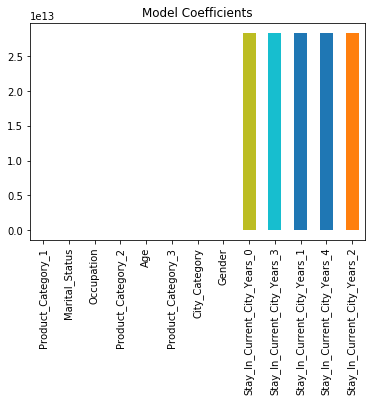

In [50]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression(normalize=True)

predictors = train.columns.drop(['Purchase','Product_ID','User_ID'])
modelfit(LR, train, test, predictors, target, IDcol, 'LR.csv')

coef1 = pd.Series(LR.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')


Model Report
RMSE : 2900
CV Score : Mean - 2939 | Std - 20.3 | Min - 2899 | Max - 2971


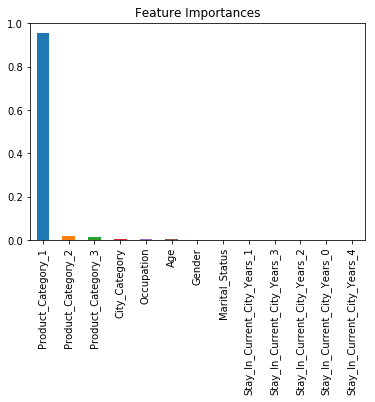

In [29]:
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(DT, train, test, predictors, target, IDcol, 'DT.csv')

coef3 = pd.Series(DT.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')

In [31]:
#Apply function len(unique()) to every data variable
train.apply(lambda x: len(x.unique()))

User_ID                          5891
Product_ID                       3631
Gender                              2
Age                                 7
Occupation                         21
City_Category                       3
Marital_Status                      2
Product_Category_1                 20
Product_Category_2                 18
Product_Category_3                 16
Purchase                        18105
Stay_In_Current_City_Years_0        2
Stay_In_Current_City_Years_1        2
Stay_In_Current_City_Years_2        2
Stay_In_Current_City_Years_3        2
Stay_In_Current_City_Years_4        2
dtype: int64


Model Report
RMSE : 4622
CV Score : Mean - 4626 | Std - 30.78 | Min - 4572 | Max - 4679


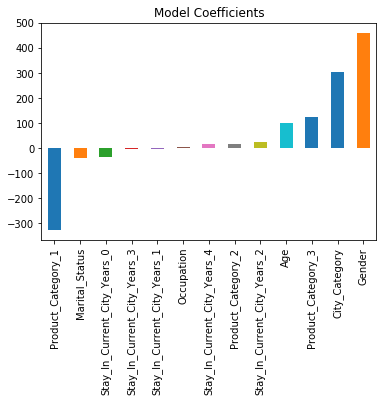

In [33]:
from sklearn.linear_model import Ridge
RR = Ridge(alpha=0.05,normalize=True)
modelfit(RR, train, test, predictors, target, IDcol, 'RR.csv')

coef2 = pd.Series(RR.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients')


Model Report
RMSE : 2966
CV Score : Mean - 2980 | Std - 19.5 | Min - 2941 | Max - 3012


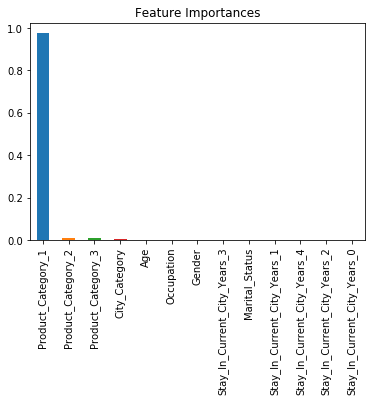

In [34]:
RF = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(RF, train, test, predictors, target, IDcol, 'RF.csv')

coef4 = pd.Series(RF.feature_importances_, predictors).sort_values(ascending=False)
coef4.plot(kind='bar', title='Feature Importances')

In [38]:
!pip install --upgrade xgboost